In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
import torch.nn.functional as F

In [ ]:
classification_output = np.load('./test_output.npy')
classification_label = np.load('../../local_data/classification/classifier_test/test_target_classification.npy')

print(np.shape(classification_label))
print(np.shape(classification_output))

(3000,)
(3000,)


In [97]:
classification_output_tensor = torch.tensor(classification_output)
probabilities = torch.sigmoid(classification_output_tensor)

predictions = torch.round(probabilities)

print(probabilities)
predictions = predictions.detach().numpy()
print(predictions)

tensor([1.5068e-01, 8.4288e-01, 7.0471e-03,  ..., 2.3585e-04, 6.3900e-05,
        7.4352e-03])
[0. 1. 0. ... 0. 0. 0.]


In [98]:
classification_label
print(np.shape(classification_label))

(3000,)


In [99]:
def accuracy_classification(classification_output_convert, classification_label):
    score = 0
    for i in range(len(classification_label)):
        if classification_output_convert[i] == classification_label[i]:
            score += 1
    
    return score/len(classification_label)

In [106]:
accuracy_classification(predictions,classification_label)

0.7893333333333333

[[1159  334]
 [ 298 1209]]


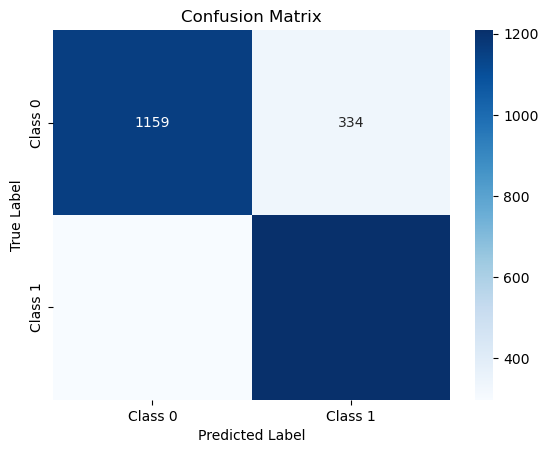

In [107]:
# Assuming y_true and y_pred are the true labels and predicted labels
%matplotlib inline
y_true = classification_label
y_pred = predictions
# Confusion matrix with explicit labels

# Assuming y_true and y_pred are defined
cm = confusion_matrix(y_true, y_pred)
print(cm)
# Define class names
class_names = ['Class 0', 'Class 1']

# Plot confusion matrix with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# accuracy per bin

wind_speeds = np.load('../../local_data/classification/classifier_test/test_target_value.npy')
bin_01 = np.where(wind_speeds < 1)
bin_12 = np.where((wind_speeds >= 1) & (wind_speeds < 2))
bin_23 = np.where((wind_speeds >= 2) & (wind_speeds < 3))
bin_34 = np.where((wind_speeds >= 3) & (wind_speeds < 4))
bin_45 = np.where((wind_speeds >= 4) & (wind_speeds < 5))
bin_56 = np.where((wind_speeds >= 5) & (wind_speeds < 6))
bin_67 = np.where((wind_speeds >= 6) & (wind_speeds < 7))
bin_78 = np.where((wind_speeds >= 7) & (wind_speeds < 8))
bin_89 = np.where((wind_speeds >= 8) & (wind_speeds < 9))
bin_910 = np.where((wind_speeds >= 9) & (wind_speeds < 10))
bin_10 = np.where(wind_speeds >= 10)

accuracy01 = accuracy_classification(predictions[bin_01],classification_label[bin_01])
accuracy12 = accuracy_classification(predictions[bin_12],classification_label[bin_12])
accuracy23 = accuracy_classification(predictions[bin_23],classification_label[bin_23])
accuracy34 = accuracy_classification(predictions[bin_34],classification_label[bin_34])
accuracy45 = accuracy_classification(predictions[bin_45],classification_label[bin_45])
accuracy56 = accuracy_classification(predictions[bin_56],classification_label[bin_56])
accuracy67 = accuracy_classification(predictions[bin_67],classification_label[bin_67])
accuracy78 = accuracy_classification(predictions[bin_78],classification_label[bin_78])
accuracy89 = accuracy_classification(predictions[bin_89],classification_label[bin_89])
accuracy910 = accuracy_classification(predictions[bin_910],classification_label[bin_910])
accuracy10 = accuracy_classification(predictions[bin_10],classification_label[bin_10])

print('accuracy between 0 and 1 m/s:', accuracy01)
print('accuracy between 1 and 2 m/s:', accuracy12)
print('accuracy between 2 and 3 m/s:', accuracy23)
print('accuracy between 3 and 4 m/s:', accuracy34)
print('accuracy between 4 and 5 m/s:', accuracy45)
print('accuracy between 5 and 6 m/s:', accuracy56)
print('accuracy between 6 and 7 m/s:', accuracy67)
print('accuracy between 7 and 8 m/s:', accuracy78)
print('accuracy between 8 and 9 m/s:', accuracy89)
print('accuracy between 9 and 10 m/s:', accuracy910)
print('accuracy between 10 m/s and above:', accuracy10)


accuracy between 0 and 1 m/s: 0.9193548387096774
accuracy between 1 and 2 m/s: 0.8401826484018264
accuracy between 2 and 3 m/s: 0.7587768969422424
accuracy between 3 and 4 m/s: 0.3717948717948718
accuracy between 4 and 5 m/s: 0.6639344262295082
accuracy between 5 and 6 m/s: 0.6380090497737556
accuracy between 6 and 7 m/s: 0.8320610687022901
accuracy between 7 and 8 m/s: 0.8269896193771626
accuracy between 8 and 9 m/s: 0.835
accuracy between 9 and 10 m/s: 0.8888888888888888
accuracy between 10 m/s and above: 0.8813559322033898
